<a href="https://colab.research.google.com/github/sznajder/ON-Minicurso-2022/blob/main/MLP_MNIST_Keras_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JUPYTER NOTEBOOK FOR A MLP with SOFTMAX output 
LEARNING MNIST NUMBERS from 0 to 9**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix , ConfusionMatrixDisplay
from scikitplot.metrics import plot_confusion_matrix


**Define the network hyperparameters**

In [2]:
# Trainign batch size 
batch_size = 64
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1
# Dropout rate
drop=0.1

**Load the MNIST dataset and format it for train and validation**

In [12]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("y_train=",y_train)
Y_train = utils.to_categorical(y_train, nb_classes)
print("Y_Train=",Y_train)
Y_test = utils.to_categorical(y_test, nb_classes)


y_train= [5 0 4 ... 5 6 8]
Y_Train= [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


**Define the MLP achitecture using KERAS sequential API**

In [4]:
# Multilayer Perceptron model
model = Sequential()
# Input layer
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dropout(drop))
# Hidden layers
hidden_nodes = {1:50,2:25}
#hidden_nodes = {1:50,2:50,3:50,4:50,5:50,6:50,7:50} 
for nhid in hidden_nodes.values():
  model.add(Dense(activation="relu", units=int(nhid), kernel_initializer="normal")) # after first layer no need to specify input_dim
  model.add(Dropout(drop))
# Output layer
model.add(Dense(activation="softmax", units=10, kernel_initializer="normal"))
# Compile and print model
model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)          

/Users/sznajder/WorkM1/miniforge3/envs/tf28/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


**Train the MLP**

In [5]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=1)


Epoch 1/50


2024-02-27 17:27:12.446648: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


657/657 [==============================] - 10s 15ms/step - loss: 1.4099 - accuracy: 0.4996 - val_loss: 0.6071 - val_accuracy: 0.7871
Epoch 2/50
657/657 [==============================] - 10s 15ms/step - loss: 0.3913 - accuracy: 0.8872 - val_loss: 0.2780 - val_accuracy: 0.9171
Epoch 3/50
657/657 [==============================] - 10s 15ms/step - loss: 0.2460 - accuracy: 0.9294 - val_loss: 0.1793 - val_accuracy: 0.9478
Epoch 4/50
657/657 [==============================] - 10s 14ms/step - loss: 0.1886 - accuracy: 0.9463 - val_loss: 0.1731 - val_accuracy: 0.9512
Epoch 5/50
657/657 [==============================] - 10s 15ms/step - loss: 0.1556 - accuracy: 0.9539 - val_loss: 0.1872 - val_accuracy: 0.9457
Epoch 6/50
657/657 [==============================] - 10s 15ms/step - loss: 0.1358 - accuracy: 0.9595 - val_loss: 0.1361 - val_accuracy: 0.9616
Epoch 7/50
657/657 [==============================] - 10s 15ms/step - loss: 0.1130 - accuracy: 0.9665 - val_loss: 0.1254 - val_accuracy: 0.9646
Epo

**Evaluate the MLP performance**

In [6]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.1385 - accuracy: 0.9721
Summary: Loss over the test dataset: 0.14, Accuracy: 0.97


**Plot the training and validation performances**

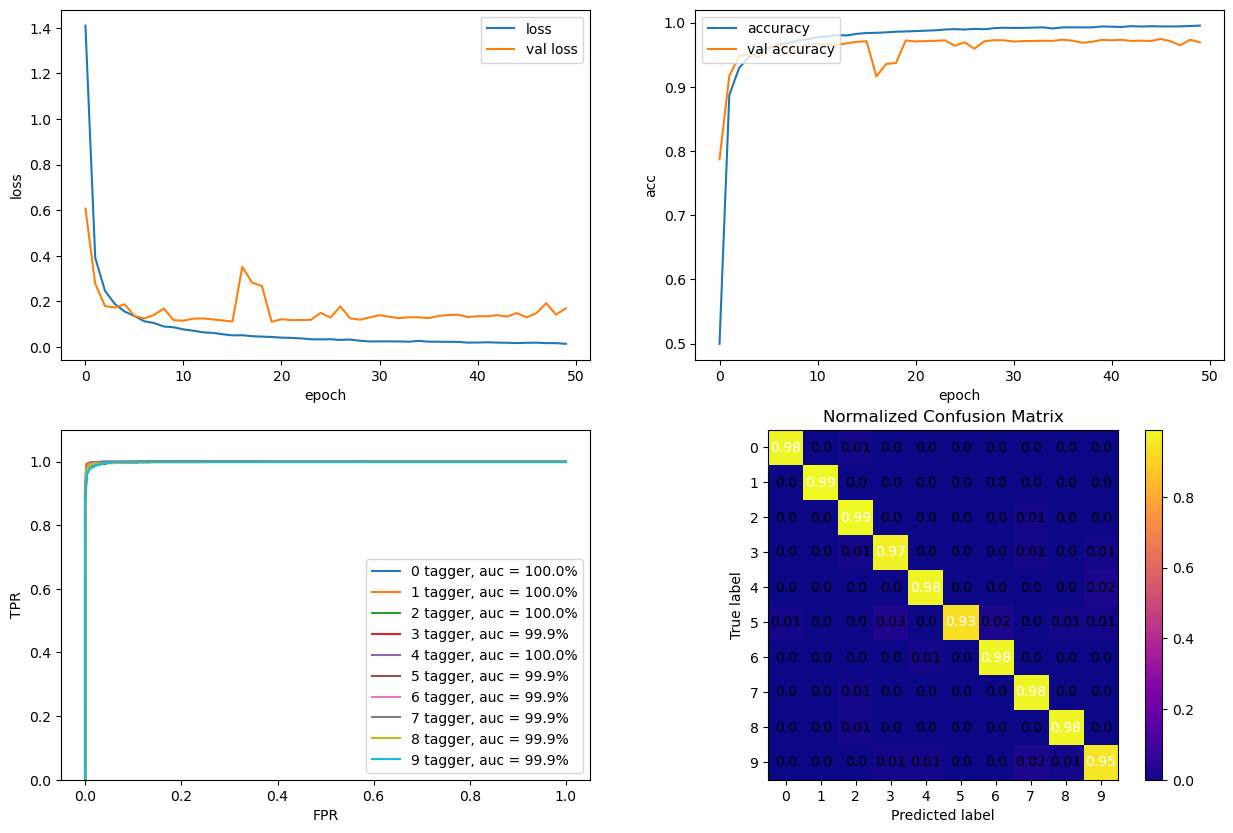

In [47]:
# Plot loss vs epoch
plt.figure(figsize=(15,10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

# Plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label='val accuracy')
#ax.plot(history.history['categorical_accuracy'], label='categorical_accuracy')
#ax.plot(history.history['val_categorical_accuracy'], label='val categorical accuracy')
ax.legend(loc="upper left")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# Plot the ROC curves
labels = ['gluon', 'quark', 'W', 'Z', 'top']
fpr = {}
tpr = {}
auc1 = {}
precision = {}
recall = {}
NN = {}
NP = {}
TP = {}
FP = {}
TN = {}
FN = {}
tresholds = {}


ax = plt.subplot(2, 2, 3)
Y_pred = model.predict(X_test)

# Loop over classes(labels) to get metrics per class
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
for i, label in enumerate(labels):
    fpr[label], tpr[label], tresholds[label] = roc_curve(Y_test[:,i], Y_pred[:,i])
    auc1[label] = auc(fpr[label], tpr[label])
    ax.plot(fpr[label],tpr[label],label='%s tagger, auc = %.1f%%'%(label,auc1[label]*100.))

ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_ylim(0,1.1)
#ax.set_grid(True)
ax.legend(loc='lower right')


# Plot Confusion matrix
ax = plt.subplot(2, 2, 4)
plot_confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1), normalize='all', cmap=plt.cm.Blues, ax=ax)

# Display the plots
plt.show()

(10000, 10)


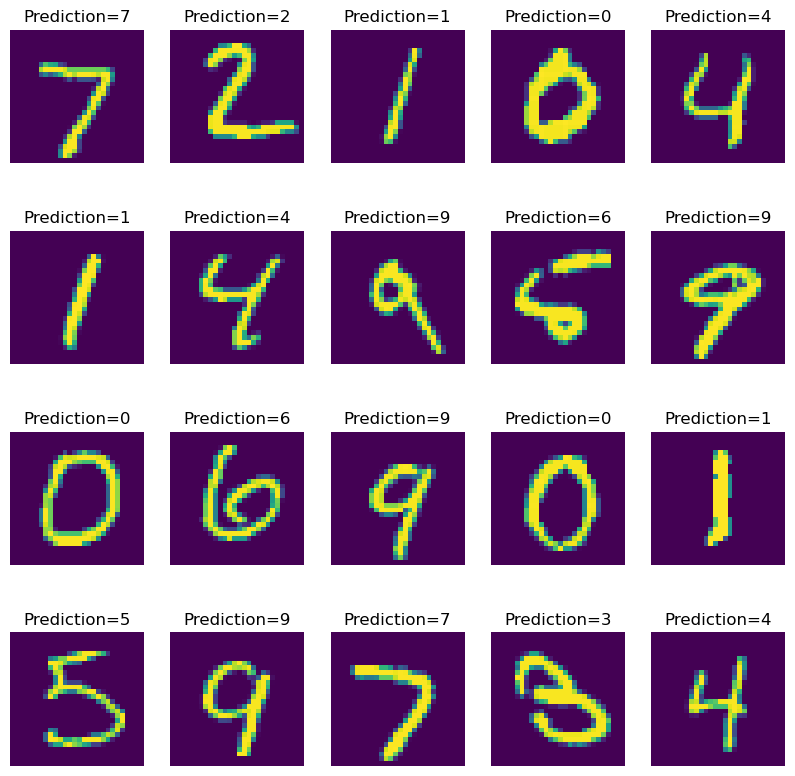

In [45]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test) 
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()

**Exercises:**

---


**Question 1**: What happens if you increase/decrease the number of hidden layers?


**Question 2:** What happens if you increase/decrease the number of nodes per hidden layer?

**Question 3:** What happens if you increase/decrease the learning rate ?

**Question 4:** What happens if you increase/decrease the number of training epochs  ?

**Question 5:** What happens if you increase/decrease the training batch size ?

**Question 6:** What happens if you use the ReLU activation function in the hidden layers ?